# LEGO Data Analysis - Rebrickable

The dataset is from https://rebrickable.com/downloads/. 

From the Rebrickable website - "The LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database is available for download as csv files here. These files are automatically updated daily. If you need more details, you can use the API which provides real-time data, but has rate limits that prevent bulk downloading of data."

Rebrickable provides this database to be used for any purpose.

## LEGO Data Model

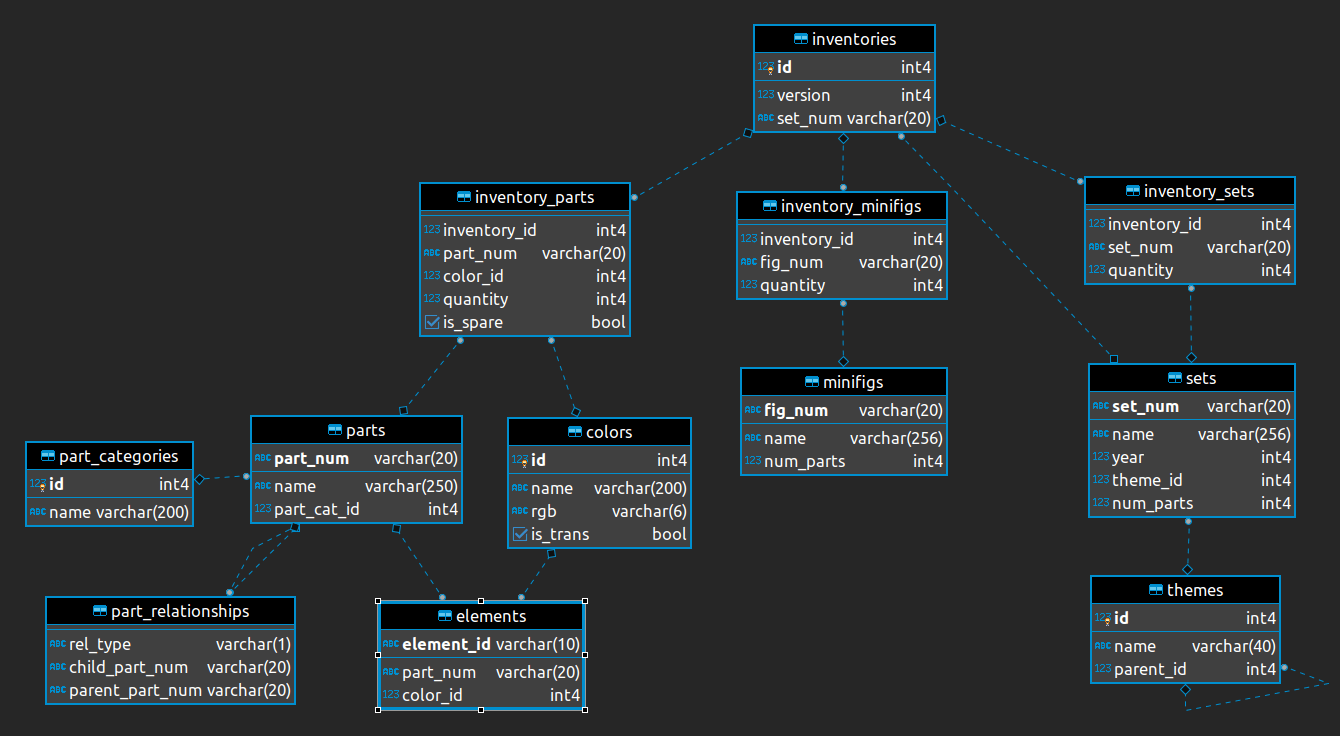

#### Importing Libraries

In [ ]:
#pip install pandas

In [1]:
import pandas as pd
import numpy as np

#### Getting Data

In [26]:
sets = pd.read_csv('data_source/sets.csv')
sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
18909,XWING-1,Mini X-Wing Fighter,2019,158,60
18910,XWING-2,X-Wing Trench Run,2019,158,52
18911,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
18912,YTERRIER-1,Yorkshire Terrier,2018,598,0


In [27]:
themes = pd.read_csv('data_source/themes.csv')
themes

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0
...,...,...,...
439,715,Marvel,535.0
440,716,Modulex,NaN
441,717,Speed Racer,NaN
442,718,Series 22 Minifigures,535.0


#### Display Top 10 Rows of the sets dataset

In [29]:
sets.head(10)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1979,186,15
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3
9,003-1,Master Mechanic Set,1966,366,403


#### Display Last 10 Rows of the sets dataset

In [31]:
sets.tail(10)

,set_num,name,year,theme_id,num_parts
18904,XBOXGAME-1,Batman the Videogame - Xbox 360,2008,501,0
18905,XBOXGAME-2,Bionicle Heroes - Xbox 360,2006,501,0
18906,XBOXGAME-3,DC Super-Villains - Xbox One,2018,501,0
18907,XBOXGAME-9,Star Wars: The Video Game - Xbox,2005,501,0
18908,XMASTREE-1,Christmas Tree,2019,410,26
18909,XWING-1,Mini X-Wing Fighter,2019,158,60
18910,XWING-2,X-Wing Trench Run,2019,158,52
18911,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
18912,YTERRIER-1,Yorkshire Terrier,2018,598,0
18913,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


#### Check Datatype of Each Column

In [32]:
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

#### Check NULL Values in Sets

In [34]:
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

In [36]:
themes.isnull().sum()

id             0
name           0
parent_id    138
dtype: int64

#### How many Rows and Columns are there in our dataset

In [37]:
sets.shape

(18914, 5)

In [39]:
len(sets.columns)

5

In [41]:
len(sets)

18914

In [42]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18914 entries, 0 to 18913
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    18914 non-null  object
 1   name       18914 non-null  object
 2   year       18914 non-null  int64 
 3   theme_id   18914 non-null  int64 
 4   num_parts  18914 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 739.0+ KB


## MERGE DATA
#### Joining the two datasets to answer questions

In [44]:
sets_themes = pd.merge(sets, themes, how = 'left', left_on = 'theme_id', right_on = 'id', suffixes = ('_sets', '_themes'))

In [46]:
sets_themes.head()

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0


In [47]:
sets_themes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18914 entries, 0 to 18913
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   set_num      18914 non-null  object 
 1   name_sets    18914 non-null  object 
 2   year         18914 non-null  int64  
 3   theme_id     18914 non-null  int64  
 4   num_parts    18914 non-null  int64  
 5   id           18914 non-null  int64  
 6   name_themes  18914 non-null  object 
 7   parent_id    8672 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.3+ MB


In [48]:
sets_themes.columns

Index(['set_num', 'name_sets', 'year', 'theme_id', 'num_parts', 'id',
       'name_themes', 'parent_id'],
      dtype='object')

### Now Let's Answer some Questions

#### 1.) What is the total number of parts per theme

In [57]:
Num_Parts_per_Theme = sets_themes.groupby('name_themes').sum().reset_index()
Num_Parts_per_Theme = Num_Parts_per_Theme[['name_themes', 'num_parts']].sort_values('num_parts', ascending = False)
Num_Parts_per_Theme

,name_themes,num_parts
303,Technic,221198
292,Star Wars,220914
66,Creator Expert,128829
64,Creator,102356
209,Ninjago,96550
...,...,...
16,Aquazone,26
354,Zooters,25
229,Powered Up,21
339,Value Packs,1


#### 2.) What is the total number of parts per year

In [58]:
Num_Parts_per_Year = sets_themes.groupby('year').sum().reset_index()
Num_Parts_per_Year = Num_Parts_per_Year[['year', 'num_parts']].sort_values('num_parts', ascending = False)
Num_Parts_per_Year

,year,num_parts
70,2021,264827
69,2020,211842
68,2019,191505
66,2017,178606
67,2018,171717
...,...,...
5,1956,246
3,1954,117
8,1959,65
2,1953,50


#### 3.) How many sets where created in each Century in the dataset

We have to add Century as a derived column to the sets_themes dataset

In [65]:
unique_year = sets_themes['year'].unique()
unique_year.sort()
unique_year

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [67]:
sets_themes['year'] > 2000

sets_themes['Century'] = np.where(sets_themes['year'] > 2000, '21st_Century', '20th_Century')

In [68]:
sets_themes

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
0,001-1,Gears,1965,1,43,1,Technic,NaN,20th_Century
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0,20th_Century
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0,20th_Century
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th_Century
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th_Century
...,...,...,...,...,...,...,...,...,...
18909,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN,21st_Century
18910,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN,21st_Century
18911,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,158,Star Wars,NaN,21st_Century
18912,YTERRIER-1,Yorkshire Terrier,2018,598,0,598,Promotional,NaN,21st_Century


In [74]:
Num_set_per_Century = sets_themes.groupby('Century').count().reset_index()
Num_set_per_Century [['Century', 'set_num']]

,Century,set_num
0,20th_Century,4858
1,21st_Century,14056


#### 4.) What percentage of sets ever released in the 21st Century were Trains Themed 

In [82]:
Century_21_Data = sets_themes[ sets_themes['Century'] == '21st_Century']
Train = Century_21_Data[ Century_21_Data['name_themes'].str.contains('Train')]

In [85]:
Century_21_Data.shape[0]

14056

In [86]:
Train.shape[0]

63

In [88]:
Train.shape[0] / Century_21_Data.shape[0] * 100

0.4482071713147411

#### 5.) What percentage of sets ever released in the 21st Century were Disney Themed

In [90]:
Disney = Century_21_Data[ Century_21_Data['name_themes'].str.contains('Disney')]
Disney

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
414,10509-1,Dusty and Chug,2013,627,16,627,Disney Planes,504.0,21st_Century
416,10510-1,Ripslinger's Air Race,2013,627,40,627,Disney Planes,504.0,21st_Century
417,10511-1,Skipper's Flight School,2013,627,53,627,Disney Planes,504.0,21st_Century
421,10515-1,Ariel's Undersea Castle,2013,640,39,640,Disney Princess,504.0,21st_Century
422,10516-1,Ariel's Magical Boat Ride,2012,640,30,640,Disney Princess,504.0,21st_Century
...,...,...,...,...,...,...,...,...,...
12343,71044-1,Disney Train and Station,2019,608,2927,608,Disney,NaN,21st_Century
17918,CINDERELLASCASTLE-1,Cinderella’s Castle,2017,608,102,608,Disney,NaN,21st_Century
18722,ROSE-1,The Beast's Enchanted Rose,2017,608,0,608,Disney,NaN,21st_Century
18818,TRUCOGSWORTH-1,Cogsworth,2016,608,48,608,Disney,NaN,21st_Century


In [92]:
Disney.shape[0]

176

In [93]:
Disney.shape[0] / Century_21_Data.shape[0] * 100

1.2521343198634036

#### 6.) What is the popular theme by year in terms of sets released in the 21st Century

In [103]:
Popular_Theme_per_Year = Century_21_Data.groupby(['year', 'name_themes']).count().reset_index()
Popular_Theme_per_Year = Popular_Theme_per_Year[['year', 'name_themes', 'set_num']].sort_values('set_num', ascending = False)
Popular_Theme_per_Year.drop_duplicates('year').sort_values('year', ascending = False)

,year,name_themes,set_num
1370,2022,City,25
1327,2021,Gear,225
1252,2020,Gear,150
1181,2019,Gear,171
1104,2018,Gear,115
1035,2017,Gear,141
953,2016,Gear,97
866,2015,Gear,87
786,2014,Gear,97
707,2013,Gear,94


#### 7.) What is the most produced color of lego ever in terms of quantity of parts?

In [105]:
colors = pd.read_csv('data_source/colors.csv')
colors

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
210,1084,Two-tone Gold,AB673A,f
211,1085,Two-tone Silver,737271,f
212,1086,Pearl Lime,6A7944,f
213,1087,Duplo Pink,FF879C,f


In [107]:
inventory_parts = pd.read_csv('data_source/inventory_parts.csv')
inventory_parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,stickerupn0077,9999,1,f
3,1,upn0342,0,1,f
4,1,upn0350,25,1,f
...,...,...,...,...,...
1005436,128964,19888,0,1,f
1005437,128964,3626cpr1670,78,1,f
1005438,128964,59276,0,1,f
1005439,128964,970c00pr2273,0,1,f


#### Note - Join two datasets to answer question

In [109]:
color_inventory = pd.merge(inventory_parts, colors, how = 'left', left_on = 'color_id', right_on = 'id')
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1005436,128964,19888,0,1,f,0,Black,05131D,f
1005437,128964,3626cpr1670,78,1,f,78,Light Nougat,F6D7B3,f
1005438,128964,59276,0,1,f,0,Black,05131D,f
1005439,128964,970c00pr2273,0,1,f,0,Black,05131D,f


In [119]:
color_inventory.rename(columns={'name': 'color_name'}, inplace = True)

In [120]:
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,color_name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1005436,128964,19888,0,1,f,0,Black,05131D,f
1005437,128964,3626cpr1670,78,1,f,78,Light Nougat,F6D7B3,f
1005438,128964,59276,0,1,f,0,Black,05131D,f
1005439,128964,970c00pr2273,0,1,f,0,Black,05131D,f


In [124]:
Popular_Color = color_inventory.groupby('color_name').sum().reset_index()
Popular_Color = Popular_Color[['color_name', 'quantity']].sort_values('quantity', ascending = False)

Popular_Color.head(50)

,color_name,quantity
1,Black,636633
59,Light Bluish Gray,378738
197,White,375293
24,Dark Bluish Gray,266282
136,Red,253350
2,Blue,176714
198,Yellow,174936
154,Tan,123258
137,Reddish Brown,104626
60,Light Gray,101258
